In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
X = dataset.drop(columns="MPG")
y = dataset['MPG']


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
normalization = Normalization()
normalization.adapt(X_train)

In [10]:
normalization.mean

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[5.48242807e+00, 1.95517578e+02, 1.04594246e+02, 2.98612476e+03,
        1.55440893e+01, 7.62076721e+01, 1.55591059e+00]], dtype=float32)>

In [11]:
normalization.variance

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[2.8822794e+00, 1.0733100e+04, 1.4609567e+03, 7.0524600e+05,
        7.9149899e+00, 1.3135786e+01, 6.4943010e-01]], dtype=float32)>

In [12]:
model = Sequential()
model.add(normalization)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [13]:
# compile - loss ?
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [14]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 583.4308 - val_loss: 510.7810
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 526.0475 - val_loss: 447.4677
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 448.8765 - val_loss: 362.8102
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 348.4103 - val_loss: 262.8871
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 239.7044 - val_loss: 161.7080
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 137.1424 - val_loss: 81.9845
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 67.9094 - val_loss: 46.8412
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 45.9223 - val_loss: 42.3893
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 40.3720 - val_loss: 35.8283
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 33.23

In [ ]:
model.predict(X_test)

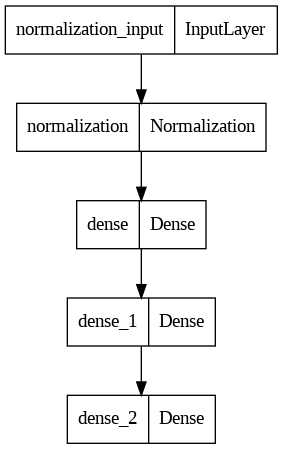

In [16]:
tf.keras.utils.plot_model(model)

In [17]:
model.save('mpg_model.h5')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 7)                 15        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9360 (36.57 KB)
Trainable params: 9345 (36.50 KB)
Non-trainable params: 15 (64.00 Byte)
_________________________________________________________________


In [27]:
model.layers[0].get_weights()

[array([5.48242807e+00, 1.95517578e+02, 1.04594246e+02, 2.98612476e+03,
        1.55440893e+01, 7.62076721e+01, 1.55591059e+00], dtype=float32),
 array([2.8822794e+00, 1.0733100e+04, 1.4609567e+03, 7.0524600e+05,
        7.9149899e+00, 1.3135786e+01, 6.4943010e-01], dtype=float32),
 313]

In [20]:
# model checkpointing

mc = tf.keras.callbacks.ModelCheckpoint('mpg_model.h5', monitor='val_loss',
                                        mode='min', save_best_only=True,verbose=1)

In [21]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [22]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test, y_test), callbacks=[mc])

Epoch 1/100
 1/10 [==>...........................] - ETA: 10s - loss: 6.9867
Epoch 1: val_loss improved from inf to 7.35874, saving model to mpg_model.h5
10/10 [==============================] - 1s 39ms/step - loss: 6.9610 - val_loss: 7.3587
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 7.2733
Epoch 2: val_loss improved from 7.35874 to 6.95725, saving model to mpg_model.h5
10/10 [==============================] - 0s 13ms/step - loss: 7.0315 - val_loss: 6.9573
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 3.7523
Epoch 3: val_loss did not improve from 6.95725
10/10 [==============================] - 0s 8ms/step - loss: 6.8404 - val_loss: 6.9826
Epoch 4/100
 1/10 [==>...........................] - ETA: 0s - loss: 5.9682
Epoch 4: val_loss improved from 6.95725 to 6.72031, saving model to mpg_model.h5
10/10 [==============================] - 0s 10ms/step - loss: 6.6945 - val_loss: 6.7203
Epoch 5/100
 1/10 [==>...........................] - ETA: 

In [25]:
type(history.history)

dict

In [26]:
d = history.history
d.keys()

dict_keys(['loss', 'val_loss'])